In [1]:
!pip install dostoevsky

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 1.5 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3164928 sha256=65374bb674dfda2bd9acd1d9a22505d88616abb8646648a5cb5f50d263524cfc
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [3]:
!python -m dostoevsky download fasttext-social-network-model

In [4]:
import pandas as pd
import networkx
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [7]:
df = pd.read_csv('messages.csv', index_col = 0)
df.content = df.content.apply(lambda x: [message for message in x.split('\', ') if len(message) > 10])
df = df.content.apply(lambda x: x if x else None).dropna()

In [8]:
df

id
791538       ['Плохие пикаперы горят в badoo \n(feat. [id15...
3991256      [['Сезон открыт, 'И вновь Давид побеждает Голи...
5176782      [['Помогать - легко, приятно, не зазорно! \n\n...
6953588      [['[club139520341|🎂🌺🌱🌷 🍬] \n[club139520341|С д...
9198431      [['Так просто... \n \nэто так просто - приторм...
                                   ...                        
544093157    ['UPD:\nhttps://twitter.com/aarexer/status/120...
570880020    ['StackOverflow 🤯, 'ваше представление о мире ...
584335134    ['Здесь должна была быть ещё одна пачка фотогр...
602891468      ['С вами сотрудничать будет как нибудь можно ¿]
661304786    ['♥️Привет, любимые вокалисты. С первым днём л...
Name: content, Length: 92, dtype: object

In [12]:
ixs = df.index
sentiment_data = dict()

In [52]:
def get_coef(results: list) -> float:
  coef = 0
  for res in results:
    coef += (res['positive'] - res['negative'])
  return coef

for ix in ixs:
  res = model.predict(df[ix], k = 5)
  sentiment_data[ix] = get_coef(res)

In [57]:
sent_data = pd.DataFrame.from_dict(sentiment_data, orient = 'index')
sent_data.columns = ['sentiment']
sent_data

,sentiment
791538,-1.069520
3991256,0.038659
5176782,-0.724818
6953588,0.701212
9198431,0.743085
...,...
544093157,-0.043530
570880020,-0.148931
584335134,-1.175318
602891468,-0.023073


<Figure size 1152x648 with 0 Axes>

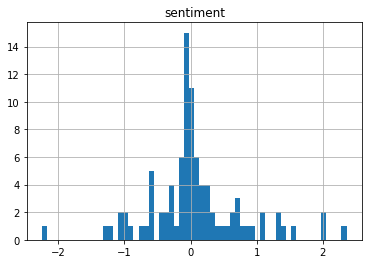

In [64]:
import matplotlib.pyplot as plt

sent_data.hist(bins = 60)
plt.show()

In [67]:
sent_data.describe()

,sentiment
count,92.000000
mean,0.065129
std,0.717319
min,-2.242924
25%,-0.223704
50%,-0.014377
75%,0.279871
max,2.359220


In [70]:
sent_data.to_csv('sentiment_data.csv', header=True, index=True)